In [44]:
from brian2 import Hz, kHz, ms, clip, Inf, SpikeMonitor, run
from brian2hears import erbspace, Sound, Gammatone, FunctionFilterbank, FilterbankGroup
import matplotlib.pyplot as plt

In [45]:
# sound = Sound.whitenoise(100*ms)
sound = Sound.tone(1*kHz,100*ms)

In [46]:
cfmin, cfmax, cfN = 20 * Hz, 20 * kHz, 3000
cf = erbspace(cfmin, cfmax, cfN)
gfb = Gammatone(sound, cf)
ihc = FunctionFilterbank(gfb, lambda x: 3 * clip(x, 0, Inf) ** (1.0 / 3.0))
# Leaky integrate-and-fire model with noise and refractoriness
eqs = """
dv/dt = (I-v)/(1*ms)+0.2*xi*(2/(1*ms))**.5 : 1 (unless refractory)
I : 1
"""
G = FilterbankGroup(ihc, "I", eqs, reset="v=0", threshold="v>1", refractory=5 * ms)
# Run, and raster plot of the spikes
M = SpikeMonitor(G)
run(sound.duration)


original plot:

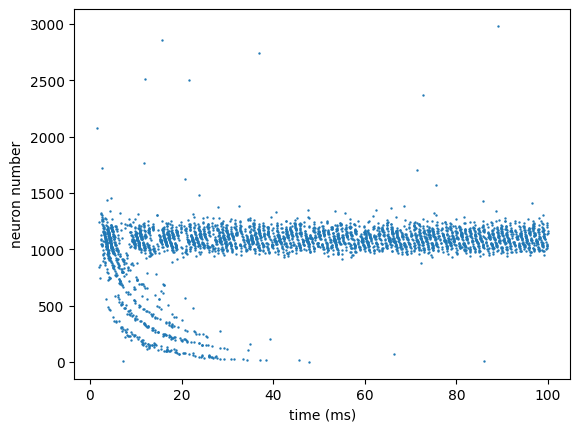

In [47]:
neuron_numbers = M.i
neuron_frequencies = [cf[nn] for nn in M.i]

anf_by_num = plt.subplot()
anf_by_num.scatter(M.t / ms, neuron_numbers, marker=".", s=2)
anf_by_num.set_ylabel("neuron number")
anf_by_num.set_xlabel("time (ms)")
plt.show()

using frequencies (because of skewed distribution becomes much less clear):

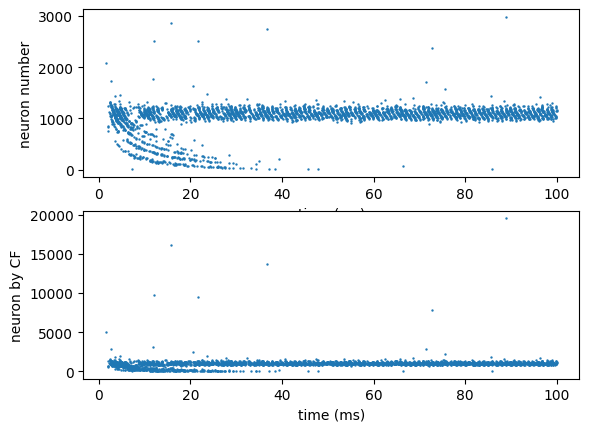

In [48]:
neuron_numbers = M.i
neuron_frequencies = [cf[nn] for nn in M.i]

fig, [anf_by_num, anf_by_frq] = plt.subplots(2,1)
anf_by_num.scatter(M.t / ms, neuron_numbers, marker=".", s=2)
anf_by_num.set_ylabel("neuron number")
anf_by_num.set_xlabel("time (ms)")
anf_by_frq.scatter(M.t / ms, neuron_frequencies, marker=".", s=2)
anf_by_frq.set_ylabel("neuron by CF")
anf_by_frq.set_xlabel("time (ms)")
plt.show()

In [49]:
print(f"using frequencies, zoomed in but still can't see much: \nfrom freq={cf[0]} to freq={cf[2000]}")

using frequencies, zoomed in but still can't see much: 
from freq=20. Hz to freq=4.44537207 kHz


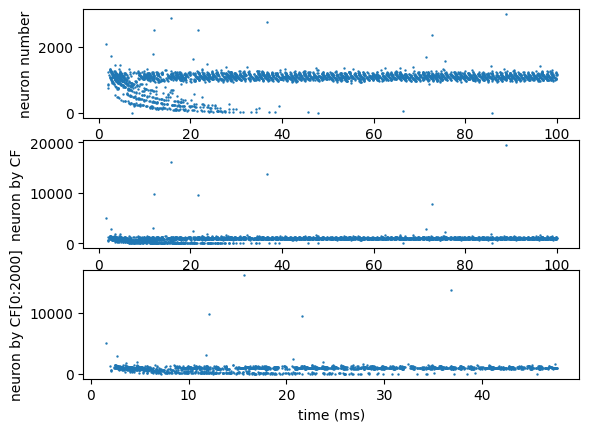

In [50]:
neuron_numbers = M.i
neuron_frequencies = [cf[nn] for nn in M.i]

fig, [anf_by_num, anf_by_frq, anf_by_frq_selected] = plt.subplots(3,1)
anf_by_num.scatter(M.t / ms, neuron_numbers, marker=".", s=2)
anf_by_num.set_ylabel("neuron number")
anf_by_num.set_xlabel("time (ms)")
anf_by_frq.scatter(M.t / ms, neuron_frequencies, marker=".", s=2)
anf_by_frq.set_ylabel("neuron by CF")
anf_by_frq.set_xlabel("time (ms)")
anf_by_frq_selected.scatter(M.t[0:2000] / ms, neuron_frequencies[0:2000], marker=".", s=2)
anf_by_frq_selected.set_ylabel("neuron by CF[0:2000]")
anf_by_frq_selected.set_xlabel("time (ms)")
plt.show()


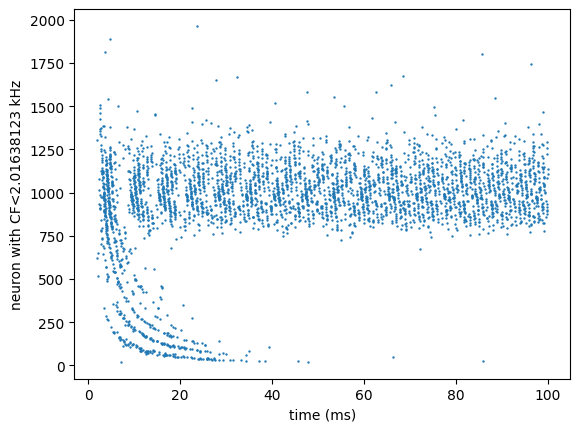

In [58]:
low_freq_spikes = []
low_freq_times = []
for time, nn in zip(M.t, M.i):
    if nn < 1500:
        low_freq_spikes.append(nn)
        low_freq_times.append(time)

anf = plt.subplot()
anf.scatter(low_freq_times / ms, [cf[nn] for nn in low_freq_spikes], marker=".", s=2)
anf.set_ylabel(f"neurons with CF<{cf[1500]}")
anf.set_xlabel("time (ms)")
plt.show()